In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohithm2","key":"3cff45cd61fc53080fd1d00a409b3604"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [4]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle competitions download -c Kannada-MNIST -p /content

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 127MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 35.5MB/s]
 52% 5.00M/9.71M [00:00<00:00, 17.2MB/s]
100% 9.71M/9.71M [00:00<00:00, 27.9MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 115MB/s]


In [6]:
!unzip \*.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  Dig-MNIST.csv.zip
  inflating: Dig-MNIST.csv           

3 archives were successfully processed.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf

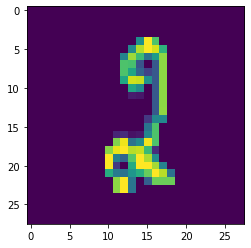

In [8]:
import pandas as pd
import numpy as np
from PIL import Image

data = pd.read_csv("/content/test.csv")
array = np.array(data)
#print(array[0,:])
array = array.astype(np.uint8).flatten().astype(np.uint8)
array1 = np.reshape(array[1:785],(-1,28))
#print(array1)
new_image = Image.fromarray(array1)
new_image.save('new.png')


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('new.png')
plt.imshow(img)
plt.show()


In [9]:
data = pd.read_csv("/content/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


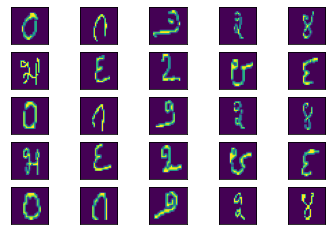

In [10]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("/content/train.csv")
array = np.array(data)
array = array.reshape(60000,785)

i=0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  X = array[i,1:]
  Y = X.reshape([28,28])
  plt.imshow(Y)

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
train = pd.read_csv("/content/train.csv").values
test = pd.read_csv("/content/train.csv").values

In [0]:
trainX = train[:,1:].reshape(-1,28,28,1).astype('float32')
X_train = trainX/255.0
y_train = train[:,0]


In [0]:
testX = test[:,1:].reshape(-1,28,28,1).astype('float32')
X_test = testX / 255.0
y_test =test[:,0]

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1083 - accuracy: 0.9664 - val_loss: 0.0289 - val_accuracy: 0.9915
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0139 - val_accuracy: 0.9957
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0099 - val_accuracy: 0.9970
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0058 - val_accuracy: 0.9982
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0080 - val_accuracy: 0.9973
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0061 - val_accuracy:

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0050 - accuracy: 0.9984


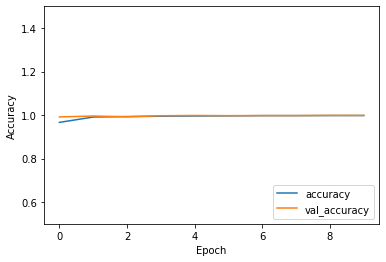

In [20]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,y_test,verbose=1)

In [21]:
print(test_acc)

0.9983833432197571


# Stage 1:

In [27]:
from google.colab import files
from io import BytesIO
uploaded = files.upload()

Saving 3.png to 3.png


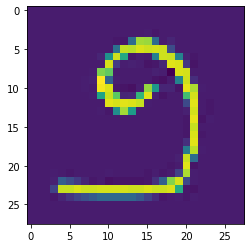

In [28]:
import cv2
image = cv2.imread('3.png')
grey = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
grey = cv2.bitwise_not(grey)
grey = cv2.resize(grey,(28,28))
plt.imshow(grey)
plt.show()

In [0]:
#img = tf.keras.preprocessing.image.load_img(
#    grey, color_mode='grayscale',target_size=(28,28)
#)
#plt.imshow(img)
#plt.show()

In [0]:
ar = tf.keras.preprocessing.image.img_to_array(grey)
ar = ar.reshape(-1,28,28,1)
ar = ar/225.0

In [0]:
#X_test[1].view()

In [30]:
pred = model.predict(ar)
pred.argmax()

2

# Stage 2:

In [38]:
from google.colab import files
from io import BytesIO
import cv2
uploaded = files.upload()

Saving 12.png to 12 (1).png


In [0]:
import matplotlib.pyplot as plt
import numpy as np

from imutils import contours


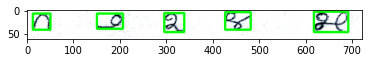

In [40]:
image = cv2.imread('12 (1).png')
grey_img = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
#grey_img = cv2.bitwise_not(grey_img)
grey_img = cv2.GaussianBlur(grey_img,(5,5),0)

ret,thresh = cv2.threshold(grey_img.copy(),200,255,cv2.THRESH_BINARY_INV)
cnts,heirarchy= cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(cnts,boundingboxes) = contours.sort_contours(cnts,method='left-to-right')

preprocessed_digits = []

for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(image,(x,y),(x+w,y+h), color=(0,255,0),thickness=4)
  digit = thresh[y:y+h,x:x+w]
  resized_digit = cv2.resize(digit,(18,18))
  padded_digit = np.pad(resized_digit,((5,5),(5,5)),"constant",constant_values=0)
  preprocessed_digits.append(padded_digit)
  
plt.imshow(image)
plt.show()

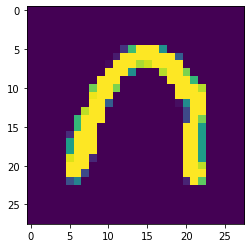

In [42]:
plt.imshow(preprocessed_digits[0])
plt.show()

In [44]:
for a in preprocessed_digits:
  ar = tf.keras.preprocessing.image.img_to_array(a)
  ar = ar.reshape(-1,28,28,1)
  ar = ar/225.0
  pred = model.predict(ar)
  print(pred.argmax())


1
2
3
4
5
